### F-Distribution

In [3]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In this case we are interested in the extent to which differences among group means are greater than we might expect under normal random variation. 

The F- statistic measures this and is the ratio of the variability among the group means to the variability within each group

The distribution of the F- statistic is the frequency distribution of all the values that would be produced by randomly permuting data in which all the group means are equal (i.e., a null model).

The F-statistic is also used in linear regres‐ sion to compare the variation accounted for by the regression model to the overall variation in the data.

The F-distribution is primarily used in statistics to compare variances and assess relationships between variables. It arises in the context of ANOVA (Analysis of Variance), regression analysis, and other tests that involve comparing the ratio of two variances.

Key Applications of the F-Distribution:

    Comparing Variances:
        Used to test if two populations have the same variance.
        Example: A two-sample F-test for equality of variances.

    ANOVA (Analysis of Variance):
        Used to compare means across multiple groups by analyzing variance.
        The F-statistic evaluates whether the variability between groups is significantly greater than the variability within groups.

    Regression Analysis:
        Used to assess the overall significance of a regression model.
        Determines if the independent variables collectively explain a significant amount of variation in the dependent variable.

    Hypothesis Testing:
        In general, the F-distribution is used in hypothesis testing where the test statistic is the ratio of two variances.
        H0:σ1^2 = σ2^2 (null hypothesis: variances are equal).
        Ha:σ1^2 ≠ σ2^2 (alternative hypothesis: variances are not equal).

### Example

Comparing Variances (F-test)

Suppose you have two datasets and want to test if their variances are equal:

    Compute the sample variances (s1^2,s2^2).

    Compute the F-statistic:
    F = s1^2 / s2^2
 

    where s1^2 is the larger variance (ensuring F≥1).

    Compare the F-statistic to the critical value from the F-distribution table (or compute the p-value).

In [71]:
from scipy.stats import f

    # Degrees of freedom
df1 = 10  # Degrees of freedom for the numerator
df2 = 15  # Degrees of freedom for the denominator


    # Compute the critical value at alpha = 0.05 (right-tailed test)

alpha = 0.05

    # ppf(q, dfn, dfd, loc=0, scale=1)
	# Percent point function (inverse of cdf — percentiles).
    # cfd = Cumulative distribution function.

critical_value = f.ppf(1 - alpha, df1, df2)


print("Critical Value:", critical_value)

    # Compute the p-value for a given F-statistic

F_statistic = 2.5 # Example F-statistic

p_value = 1 - f.cdf(F_statistic, df1, df2)
print("P-value:", p_value)

Critical Value: 2.543718549692808
P-value: 0.05313951433988695


P-values are used in hypothesis testing to help decide whether to reject the null hypothesis. The smaller the p value, the more likely you are to reject the null hypothesis

The F-test is typically a one-tailed test because it is based on the ratio of variances, which can only take non-negative values (F≥0).

#### 1. Definition of the F-Statistic

The F-statistic is the ratio of two variances:
F=s1^2 / s2^2


Since variances (s^2) are always non-negative, the F-distribution does not extend to negative values.
This inherently makes the test one-tailed.

#### 2. Testing Hypotheses in an F-Test

Null Hypothesis (H0):

The two populations have equal variances:

H0:σ1^2 = σ2^2

    
Alternative Hypothesis (Ha):

The two populations have unequal variances:
Ha : σ1^2 ≠ σ2^2


Even though the alternative hypothesis allows for σ1^2 > σ2^2 or σ1^2 < σ2^2, the test is one-tailed because:

The F-statistic is computed as F = s1^2 / s2^2 with s1^2 as the larger variance to ensure F≥1.

Extreme values in the right tail of the F-distribution indicate significant differences, regardless of which variance is larger.

#### 3. Rejection Region

In an F-test:

    A large F-statistic indicates that the variances are significantly different (reject H0).
    The rejection region lies in the right tail of the F-distribution.

For example:

    If α=0.05, the rejection region is the top 5% of the distribution (right tail).
    The critical value (Fcrit) separates this region from the rest of the distribution.



#### 5. Summary

    The F-test is one-tailed because the F-distribution only extends to the right (positive values).
    The rejection region lies in the right tail, where extreme values indicate significant differences in variances.
    This makes the F-test a one-tailed test by design, even if the hypothesis itself allows for differences in either direction.

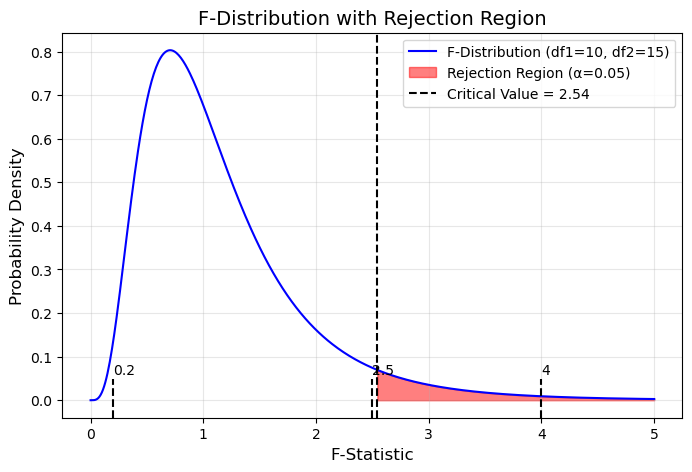

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# Parameters
df1 = 10  # Degrees of freedom for the numerator
df2 = 15  # Degrees of freedom for the denominator
alpha = 0.05  # Significance level

# Critical value
critical_value = f.ppf(1 - alpha, df1, df2)

# F-distribution
x = np.linspace(0, 5, 500)  # Range for the x-axis
y = f.pdf(x, df1, df2)  # Probability density function (PDF)

# Plotting the F-distribution
plt.figure(figsize=(8, 5))
plt.plot(x, y, label="F-Distribution (df1=10, df2=15)", color="blue")

# Highlight rejection region
x_rejection = np.linspace(critical_value, 5, 500)
y_rejection = f.pdf(x_rejection, df1, df2)
plt.fill_between(x_rejection, y_rejection, color="red", alpha=0.5, label="Rejection Region (α=0.05)")

# Add critical value line
plt.axvline(critical_value, color="black", linestyle="--", label=f"Critical Value = {critical_value:.2f}")


# Adding some F-statistics points to illustrate where they fall
F_statistic_array = [2.5, 4, 0.2]
p_values_array = 1 - f.cdf(F_statistics, df1, df2)
for f_stat in F_statistic_array:
    plt.axvline (f_stat, ymax=0.1, color="black", linestyle="--")
    plt.text(f_stat,0.06,f_stat)

# Labels and legend
plt.title("F-Distribution with Rejection Region", fontsize=14)
plt.xlabel("F-Statistic", fontsize=12)
plt.ylabel("Probability Density", fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.show()

In [69]:
p_values_array

array([0.05313951, 0.00798654, 0.99293296])